# Applied Statistics Winter 2024 Tasks

**by Nur Bujang**

tasks.ipynb
***

# Task 1: Permutations and Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea.
Six have the milk in first and the other six having tea in first.
A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it.

You agree to accept their claim if they can tell which of the six cups in your experiment had the **milk in first**.

Calculate, using Python, the probability that they select the **correct six cups**.
Here you should assume that they have no special powers in figuring it out, that they are just guessing.
Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error.
Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.
Calculate the probability, assuming they have no special powers, that the person **makes at most one error**.

Would you accept two errors? Explain.

## Plan

- Set null hypothesis and alternative hypothesis
- import libraries
- instantiate variables - totalcups, milkfirst, teafirst, allways
- Get all 6 correct - 1/all possibilities
    -math.comb - no repetition, no order
    - sixcorr, probsixcorr
- Get 5/6 (1 error) and 6/6 correct
    - fivecorronein, fivesixcorr, probfivesixcorr
- Get 4/6 correct (2 errors)
    - fourcorrtwoin, fourfivesixcorr, probfourfivesixcorr

## Methods and Implementation

Null Hypothesis: The lady cannot tell the difference between tea first or milk first.

Alternative Hypothesis: The lady can tell the difference between tea first or milk first.

In [94]:
# import library
import math

# instantiate variables
totalcups = 12
milkfirst = 6
teafirst = 6
sixcorr = math.comb(6,6)
sixcorr

1

I use math.comb <a href="https://docs.python.org/3/library/math.html#math.comb">(Python Software Foundation, 2024)</a> to pick k from n without repetition nor order, as shown also by <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

In [95]:
allways = math.comb(totalcups, milkfirst) # where k are picked from n
allways

# there are 924 possibilities

924

In [96]:
# The probability that she randomly selects the correct 6 cups
probsixcorr = sixcorr / allways
probsixcorr

0.0010822510822510823

For guessing 6/6 cups correctly, the probability is 0.001 or 0.1%. 

In [97]:
# Ways that she randomly selects 5 correct cups, 1 error
fivecorronein = math.comb(6, 5) * math.comb(6, 1)
fivecorronein

36

In [98]:
# Ways that she makes 1 error + no error
fivesixcorr = fivecorronein + sixcorr
fivesixcorr


37

In [99]:
# The probability that she makes 1 error + no error
probfivesixcorr = fivesixcorr / allways
probfivesixcorr 

0.04004329004329004

For making at most 1 error, the probability is 0.04. Assuming the significance level <a href="https://en.wikipedia.org/wiki/Statistical_significance">(Wikipedia Contributors, 2019)</a>, alpha=0.05, p < alpha, so we can reject the null hypothesis.

In [100]:
# The probability that she randomly selects 4 correct cups, 2 error
fourcorrtwoin = math.comb(6, 4) * math.comb(6, 2)
fourfivesixcorr = fourcorrtwoin + fivesixcorr

# The probability that she makes 2 error + 1 error + no error
probfourfivesixcorr = fourfivesixcorr / allways
probfourfivesixcorr

0.28354978354978355

For at most 2 errors, the probability is 0.24. Assuming the significance level is 0.05, we cannot reject the null hypothesis. 

## Conclusion

For guessing 6 milk first cups correctly, the probability is 0.001. For making at most 1 error, the probability is 0.04. At  significance level alpha=0.05, p < alpha, so we can reject the null hypothesis if the lady guesses at least 5 correct milk first cups.

If the lady makes 2 errors, the probability is 0.24. Because p > alpha, we cannot reject the null hypothesis. Therefore, we cannot accept the claim that she has special powers to differentiate between the milk first and tea first cups.

## References

McLloughlin, I. (2024). GitHub - ianmcloughlin/2425_applied_statistics. [online] GitHub. Available at: https://github.com/ianmcloughlin/2425_applied_statistics [Accessed 21 Oct. 2024].

Python Software Foundation (2024). math — Mathematical functions. [online] Python documentation. Available at: https://docs.python.org/3/library/math.html#math.comb [Accessed 21 Oct. 2024].

Wikipedia Contributors (2019). Statistical significance. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Statistical_significance [Accessed 21 Oct. 2024].

***

# Task 2: numpy's Normal Distribution

In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

## Plan

- import libraries - numpy, scipy.stats shapiro, normal, matplotlib
- instantiate variables - samplesize, mean, stddev, randsample
- generate 100000 values with numpy.random.normal
- test for normality with scipy.stats.shapiro 
- plot a histogram with matplotlib
    - on top, plot probability density function  - numpy.linspace, scipy.stats.norm

## Methods and Implementation



In [101]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

# instantiate variables
samplesize = 100000
mean = 10.0
stddev = 3.0

Then, generate 100000 values with numpy.random.normal <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">(NumPy Developer, n.d.)</a>

In [102]:
randsample = np.random.normal(loc=10.0, scale=3.0, size=100000) # where loc = mean, scale=standard deviation, size=samplesize
randsample # must be an array of sample data

array([10.93732077,  9.59480765,  7.72942629, ..., 11.03277272,
        5.28245713, 13.51058466])

Next, perform the test for normality with Shapiro-Wilk test. <a href="https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html">The SciPy community (2024)</a> states that while the Shapiro-Wilk statistic is accurate (a value between 0 and 1 shows how well the data fits a normal distribution), the p-value may not be.

In [103]:
shapirotest = stats.shapiro(randsample)
shapirotest

# warning: p-value may not be accurate for N > 5000.

# test with subsample
shapirosub = stats.shapiro(randsample[:5000]) # try

shapirotest, shapirosub


(ShapiroResult(statistic=0.999977707862854, pvalue=0.8589483499526978),
 ShapiroResult(statistic=0.9998103380203247, pvalue=0.959692656993866))

According to the Shapiro-Wilk test statistic result, the data is normally distributed.

Next, we plot the histogram of the sample according to <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">Hunter et al. (n.d.)</a>, <a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram">NumPy Developers (2024)</a> and <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

To generate he probability density function over the histogram, the limits were set according to <a href="https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.xlim.html">Hunter et al. (2017)</a>. Evenly-spaced values were generated with np.linspace <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html">(NumPy Developers, n.d.)</a>. The normal distribution was calculated with scipy.stats.norm <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html">(The SciPy community, n.d.)</a>. Finally, the line plot was created with plt.plot <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">(Hunter et al., n.d.)</a>.

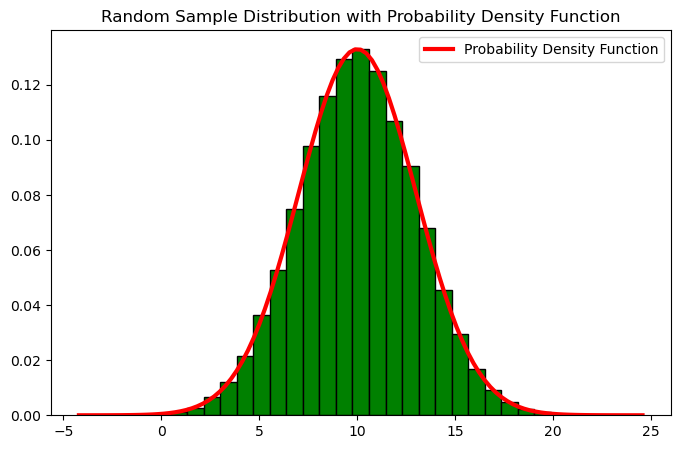

In [104]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot histogram
ax.hist(randsample, color='g', edgecolor='black', density=True, bins=31)

# Plot the corresponding normal distribution probability density function
xmin, xmax = plt.xlim() # set limits of the x-axis
x = np.linspace(xmin, xmax, 101) # generate 101 equally-spaced values
pdf = norm.pdf(x, mean, stddev)
plt.plot(x, pdf, 'r', linewidth=3, label="Probability Density Function") # line plot overlaying histogram
plt.legend()
plt.title('Random Sample Distribution with Probability Density Function');

## Conclusion

The random sample generated was normally distributed according to Shapiro-Wilk test. A histogram with overlaying corresponding normal distribution probability density function was generated.

## References

Reference listHunter, J., Dale, D., Firing, E., Droettboom, M. and Matplotlib development team (n.d.). matplotlib.pyplot.hist — Matplotlib 3.5.1 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html.

Hunter, J., Dale, D., Firing, E., Droettboom, M. and Matplotlib development team (n.d.). matplotlib.pyplot.plot — Matplotlib 3.4.1 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html.

Hunter, J., Dale, D., Firing, E., Droettboom, M. and Matplotlib development team (2017). matplotlib.pyplot.xlim — Matplotlib 2.1.2 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.xlim.html.

McLloughlin, I. (2024). GitHub - ianmcloughlin/2425_applied_statistics. [online] GitHub. Available at: https://github.com/ianmcloughlin/2425_applied_statistics [Accessed 22 Oct. 2024].

NumPy Developer (n.d.). numpy.random.normal — NumPy v1.21 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html [Accessed 22 Oct. 2024].

NumPy Developers (2024). numpy.histogram — NumPy v2.1 Manual. [online] Numpy.org. Available at: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram [Accessed 24 Oct. 2024].

NumPy Developers (n.d.). numpy.linspace — NumPy v1.23 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html [Accessed 22 Oct. 2024].

The SciPy community (n.d.). scipy.stats.norm — SciPy v1.5.4 Reference Guide. [online] docs.scipy.org. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html [Accessed 24 Oct. 2024].

The SciPy community (2024). shapiro — SciPy v1.15.0.dev Manual. [online] Github.io. Available at: https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html [Accessed 22 Oct. 2024].


***

# Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

## Plan

- Set null hypothesis and alternative hypothesis
- import libraries - scipy.stats <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">(The SciPy community, 2019)</a> as also shown by <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>
- instantiate variables - before, after with np.array
- calculate t-statistic with python (manually?)
- calculate t-statistic with scipy.stat - paired t-test (related because the values are from the same patients)
- compare the 2 results

## Methods and Implementation

Null Hypothesis: There is no difference in heart rates before and after the exercise program.

Alternative Hypothesis: There is a difference in heart rates before and after the exercise program.

To enable comparison, the two sets of multiple values from the table is organized in a structured way using np.array <a href="https://numpy.org/doc/stable/reference/generated/numpy.array.html">(NumPy Developers, n.d.)</a>.

In [110]:
# import library
import numpy as np
from scipy import stats

# instantiate variables
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])


Paired t-test was performed because the two sets of samples are related (the values are from the same patients) <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">(The SciPy community, n.d.)</a>.

In [113]:
# Perform related t-test
ttest, pval = stats.ttest_rel(before, after, alternative='greater') # greater because I think before mean > after mean
ttest, pval

(1.337227482480628, 0.10698005658702311)

## Conclusion



## References



***

# Task 4: ANOVA

In this test we will estimate the probability of committing a type II error in specific circumstances.
To begin, create a variable called `no_type_ii` and set it to `0`.

Now use a loop to perform the following test 10,000 times.

1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

Summarize and explain your results.

## Plan

- import libraries - numpy.random.normal <a href=>"https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">(NumPy Developer, n.d.)</a> as also shown by <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>
- instantiate variables - no_type_ii=0, numtest=10000, splsize=100, stddev=0.1, splone, pltwo, splthree, maybe put mean in a list means = [4.9, 5.0, 5.1], maybe splonemean, spltwomean, splthreemean
- for loop - <a href=>"https://stackoverflow.com/questions/71625642/python-range-and-for-loop-understanding">(Stack Exchange Inc, 2022)</a>, <a href=>"https://pynative.com/python-range-function/">(Hule, 2019)</a>
- one-way anova - <a href=>"https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html">(The SciPy community, 2014)</a> 

## Methods and Implementation

## Conclusion



## References



***

## End of tasks.ipynb